In [2]:
import os
import glob

import tables as tb
import numpy  as np
import pandas as pd

from collections import defaultdict
from scipy import interpolate

from gres.database import load_db as db

In [3]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 24
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 24
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [4]:
#p_mesh = np.array([2.72, 3.71, 4.78, 5.78, 6.78, 7.77, 8.77])[-3:]
p_grid = np.array([9.74, 8.62, 7.63, 6.58, 5.5, 4.5, 3.55, 2.61, 1.51])[::-1][:-1]

source = '55Fe'



dst_path = '/home/ander/Work/GaP/real_data/55Fe/Paper1/EL_yield_dst.h5'

fAlpha = False
dst_alpha_path = '/home/ander/Work/GaP/real_data/241Am/LCE_Study/LCE_and_drift_EL.h5'

data_pmt = db.DataPMT('gap', 750)

In [5]:
from scipy.interpolate import interp1d

j = np.array([95.91971832068714, 78.17935899533668, 59.52111423867904, 42.32965577879311, 28.766139283759546,19.548724270685476,13.902474439144827,10.82778126001136, 8.058421877614814, 4.778331938507145, 3.4763093863088153,2.2574514611449166,1.4659475130423867,1.0425385077307192,0.6469269791785761,0.4106641977223954,0.24350795748598159,0.16176388885439477,0.12315740410163431,0.10504649807437978,0.09591971832068694,0.10268645422887429,0.10993055512157993,0.13797570810297624,0.17715575417179444,0.28875287417994416,0.3836026325548867,0.5272777843225039,0.6042963902381322,0.7584626699552715])
ep = np.array([5.82444733420026,5.7061118335500645,5.5513654096228855,5.36931079323797,5.1690507152145635,4.968790637191157,4.814044213263978,4.713914174252276,4.5955786736020805,4.3862158647594285,4.258777633289988,4.094928478543562,3.9310793237971393,3.8309492847854343,3.6853055916775026,3.557867360208061,3.4122236671001294,3.3029908972691797,3.1300390117035097,3.020806241872561,2.966189856957087,2.8023407022106626,2.638491547464238,2.501950585175552,2.347204161248374,2.0559167750325096,1.88296488946684,1.691807542262679,1.5825747724317294,1.364109232769831])

reso_j_interp = interp1d(ep, j, fill_value='extrapolate')

In [6]:
#Params

wi         = 26.27
wi_kev   = (wi/1000)
dist       = 1.02
fano       = 0.23
ene_source = 5.9e3

n_ie       = ene_source/wi

el_yield = lambda x : 81 * x - 47

Max g2 at 8.62 bar = 730.7221299529921 +- 60.20673267686729
Min g2 at 8.62 bar = 14.547430318075541 +- 1.1992324251714084


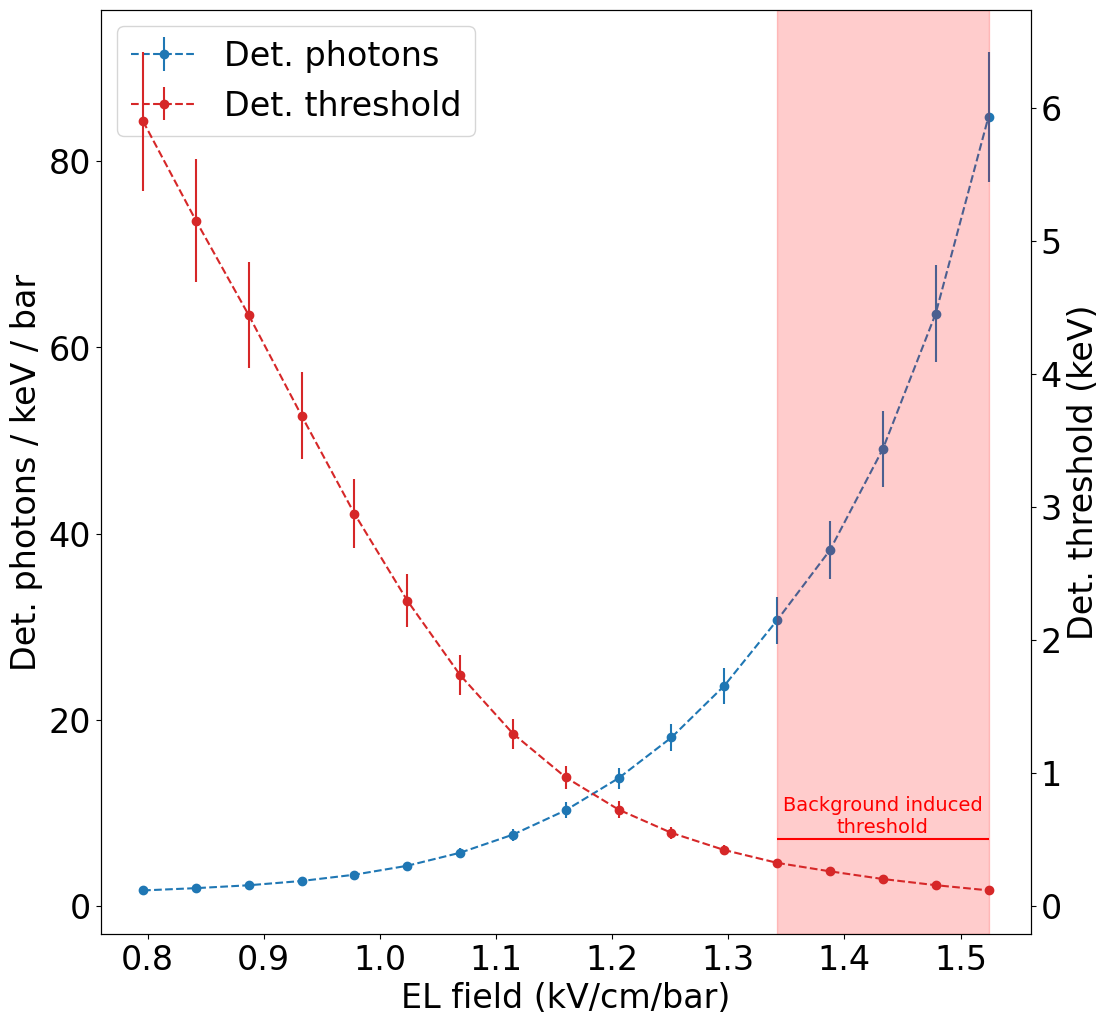

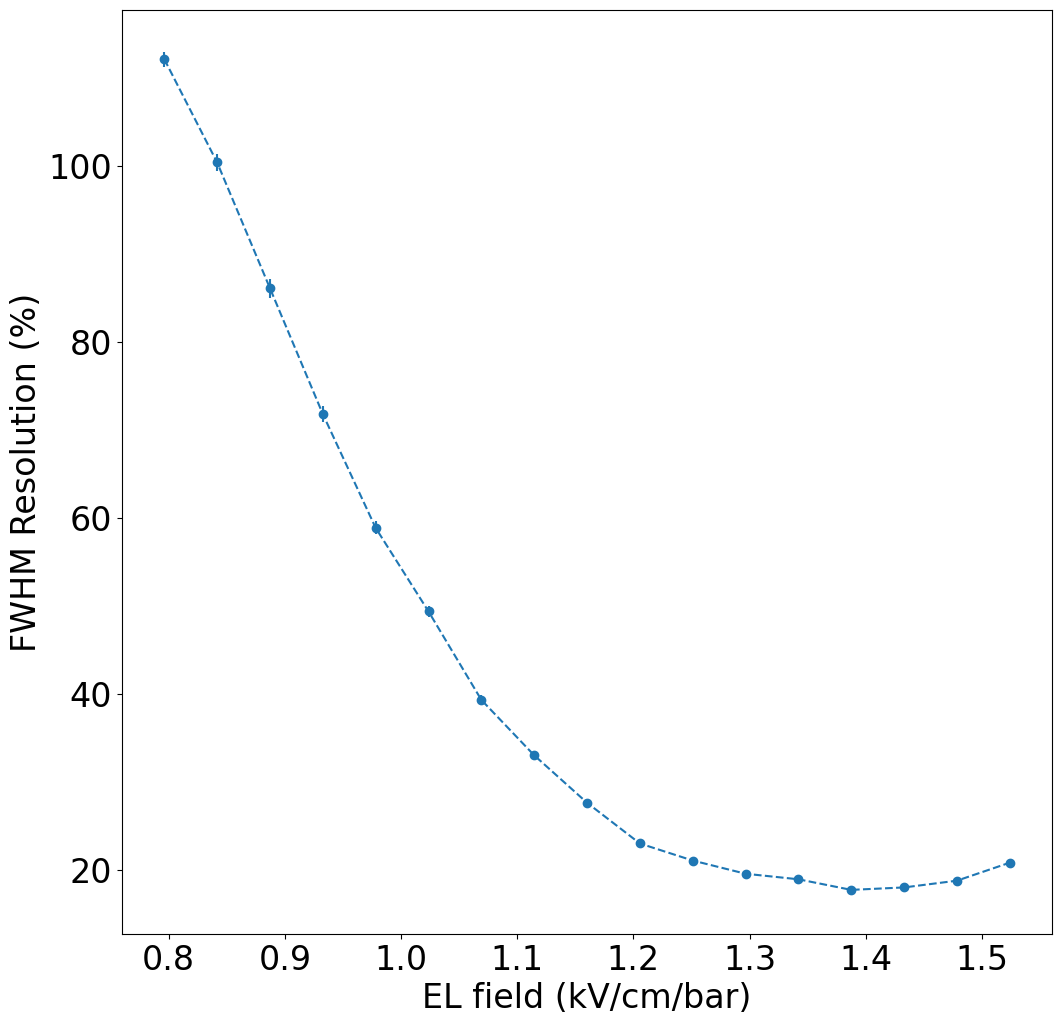

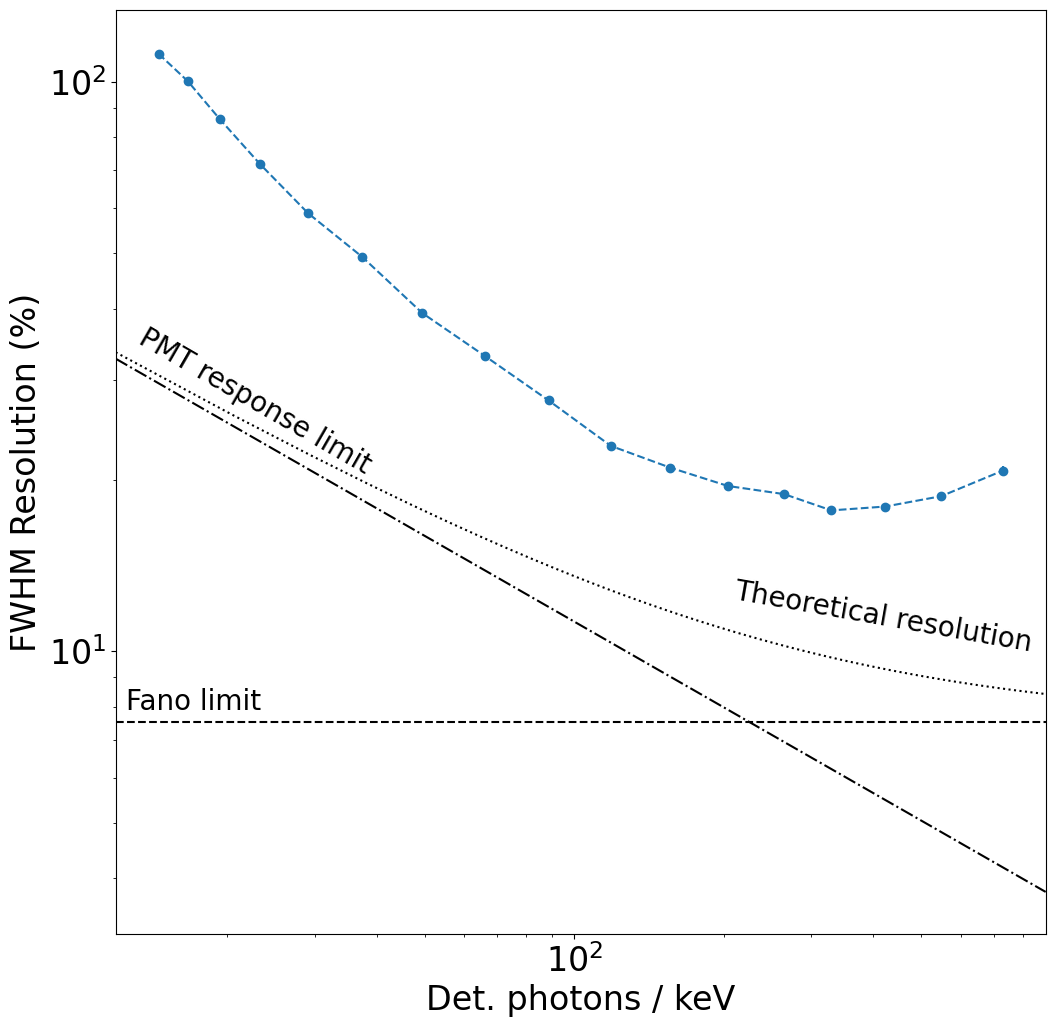

In [33]:
axes=[]
plt.figure(figsize=(12, 12))
axes.append(plt.gca())
plt.figure(figsize=(12, 12))
axes.append(plt.gca())
plt.figure(figsize=(12, 12))
axes.append(plt.gca())
#plt.figure(figsize=(12, 12))
#axes.append(plt.gca())

interpolators_g = []

elyield = lambda x : (81*x - 47)*1e3/wi

n_phot_lim = [1e8, -1e8]

data_pmt1 = db.DataPMT('gap', 733)
data_pmt2 = db.DataPMT('gap', 1099)

for pg in p_grid[-1:]:
    
    dst_g = pd.read_hdf(dst_path, f'{source}_{pg:.2f}bar_Photoetched')
    dst_g = dst_g.sort_values(by='el_volt').reset_index(drop=True)


    ### Photons / keV and / e-
    xdata = dst_g.el_volt/dst_g.pressure/dist
    ydata = dst_g.photons_kev/dst_g.pressure
    yerr  = np.sqrt((np.abs(1 - data_pmt1.adc_to_pes/data_pmt2.adc_to_pes).mean() * ydata)**2 + (dst_g.photons_kev_e/dst_g.pressure)**2)
    yerr_rel = yerr/ydata
    print(f'Max g2 at {pg} bar = {dst_g.photons_kev.max()} +- {(yerr*dst_g.pressure)[dst_g.photons_kev.argmax()]}')
    print(f'Min g2 at {pg} bar = {dst_g.photons_kev.min()} +- {(yerr*dst_g.pressure)[dst_g.photons_kev.argmin()]}')
    axes[0].errorbar(xdata,
                     ydata, 
                     yerr=yerr,
                     #label=f'{pg} bar', marker='o',ls='--')
                     label=f'Det. photons', marker='o',ls='--')
    
    if len(axes)<4:
        axes.append(axes[0].twinx())
    
    xdata = dst_g.el_volt/dst_g.pressure/dist
    ydata = dst_g.photons_kev
    ydata = ydata[0]/ydata * ene_source / 1000
    yerr  = ydata * (yerr_rel + dst_g.photons_kev_e/dst_g.photons_kev + dst_g.photons_kev_e.values[0]/dst_g.photons_kev.values[0])
    axes[3].errorbar(xdata,
                     ydata, 
                     yerr=yerr,
                     label=f'Det. threshold', marker='o',ls='--', c='C3')
    
    #ydata = dst_g.photons_kev.values[0]/(dst_g.photons_kev * wi_kev)
    #axes[3].errorbar(xdata,
    #                 ydata, 
    #                 yerr=yerr,
    #                 label=f'Det. threshold (det. photons above min.)', marker='o',ls='--', c='C3')
    
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = axes[0].get_legend_handles_labels()
    lines2, labels2 = axes[3].get_legend_handles_labels()
    axes[0].legend(lines + lines2, labels + labels2, loc=0)
    #axt = axes[0].twinx()
    xg   = dst_g.el_volt      /dst_g.pressure/dist
    yg   = dst_g.photons_kev  /dst_g.pressure*(wi/1000)
    yg_e = dst_g.photons_kev_e/dst_g.pressure*(wi/1000)
    #axt.errorbar(xg, 
    #             yg, 
    #             yerr=yg_e, 
    #marker='o',ls='--')
    
    interpolators_g.append(interpolate.interp1d(xg, yg, kind='linear', fill_value='extrapolate'))

    ### Resolution
    res_g_e = dst_g.resolution * np.sqrt((dst_g.sigma_kev_e/dst_g.sigma_kev)**2 + (dst_g.photons_kev_e/dst_g.photons_kev)**2)
    axes[1].errorbar(dst_g.el_volt/dst_g.pressure/dist, 
                     dst_g.resolution,  
                     yerr = res_g_e,
                     label=f'{pg} bar', marker='o',ls='--')
    
    axes[2].errorbar(dst_g.photons_kev, 
                     dst_g.resolution, 
                     xerr = dst_g.photons_kev_e,
                     yerr = res_g_e,
                     label=f'{pg} bar', marker='o',ls='--')
    
    n_phot_lim[0] = min(dst_g.photons_kev.min(), n_phot_lim[0])
    n_phot_lim[1] = max(dst_g.photons_kev.max(), n_phot_lim[1])

if fAlpha:
    dst_a = pd.read_hdf(dst_alpha_path, f'241Am_{8.44:.2f}bar_Ar')
    xdata = dst_a.el_volt/dst_a.pressure/dist
    axes[0].errorbar(xdata,
                     dst_a.s2_photons/dst_a.pressure/5489, 
                     yerr=dst_a.s2_photons_e/dst_a.pressure/5489,
                     label=f'Alphas @ 8.44 bar', marker='o', ls='--')  

lc = 0.01
#xdata = np.linspace(0.6, 1.5, 101)
#axes[0].plot(xdata, elyield(xdata)*lc, label=f'Coimbra (LC = {lc*100}%)', ls='-')
for ax in axes[:3]:
    ax.set_xlabel('EL field (kV/cm/bar)')
    #ax.legend()
    
axes[0].set_ylabel('Det. photons / keV / bar')
#axt    .set_ylabel('Det. photons / e⁻ / bar')
axes[1].set_ylabel('FWHM Resolution (%)')
axes[2].set_ylabel('FWHM Resolution (%)')
axes[2].set_xlabel('Det. photons / keV')

axes[2].set_xscale('log')
axes[2].set_yscale('log')
#axes[0].set_yscale('log')


reso_fano = np.sqrt(fano/n_ie)
axes[2].axhline(235*reso_fano, ls = '--', c='k')
axes[2].text(axes[2].get_xlim()[0]*1.05, 235*reso_fano*1.05, 'Fano limit', c='k', fontsize=20)

plot_lims = axes[2].get_xlim()
nphot     = np.linspace(*plot_lims, 101)
#reso_stat = 235 * np.sqrt((1+(np.abs(data_pmt.Sigma)/data_pmt.adc_to_pes).mean()**2)/nphot*5.9)
res_pmt = (np.abs(data_pmt.Sigma)/data_pmt.adc_to_pes).mean()**2
reso_stat = np.sqrt((1+res_pmt)/(nphot*5.9))
axes[2].plot(nphot, 235*reso_stat, ls='-.', c='k')
axes[2].text(axes[2].get_xlim()[0]*1.35, 235*reso_stat[2]*0.99, 'PMT response limit', c='k', rotation=-30, fontsize=20)

const = 0.5/235

xel     = dst_g.el_volt      /dst_g.pressure/dist
reso_el = np.sqrt(reso_j_interp(xel)/n_ie/(el_yield(dst_g.el_volt/dst_g.pressure)*dst_g.pressure))
#axes[2].plot(dst_g.photons_kev, 235*reso_el, ls='-.', c='k')


reso_both = np.sqrt(reso_fano**2 + reso_stat**2)

axes[2].plot(nphot, 235*reso_both, ls=':', c='k')
axes[2].text(plot_lims[1]*0.95, 235*reso_both[-2]*1.6, 
             'Theoretical resolution', c='k', rotation=-10, fontsize=20, 
             horizontalalignment='right', verticalalignment='top')

axes[2].set_xlim(plot_lims)


axes[3].set_ylabel('Det. threshold (keV)')
axes[3].axvspan(11.8/8.62/dist, xdata.max(), color='r', alpha=0.2)
xmin, xmax = 11.8/8.62/dist,xdata.max()
axes[3].hlines(0.5, xmin=xmin, xmax=xmax, color='r')
axes[3].text((xmax+xmin)/2, 0.5+0.05, 'Background induced\nthreshold', horizontalalignment='center', c='r', fontsize=14)
#axes[3].arrow(x=(xmax+xmin)/2, y=0.5, dx=0, dy=0.25, head_width=0.02, head_length=0.1, color='r')

#plt.text()
axes[0].figure.savefig(f'/home/ander/Documents/ESS/GanESS/GaP/DetectorPaper/yield_thr_{pg}bar.pdf', dpi=300)

In [48]:
xmin

1.342068149765707

In [49]:
ydata

0     5.900000
1     5.153821
2     4.442170
3     3.686279
4     2.949563
5     2.296487
6     1.736273
7     1.296185
8     0.966803
9     0.724452
10    0.549682
11    0.420682
12    0.324262
13    0.260434
14    0.202835
15    0.156496
16    0.117459
Name: photons_kev, dtype: float64

In [47]:
xdata

0     0.796142
1     0.841636
2     0.887130
3     0.932624
4     0.978117
5     1.023611
6     1.069105
7     1.114599
8     1.160093
9     1.205587
10    1.251080
11    1.296574
12    1.342068
13    1.387562
14    1.433056
15    1.478550
16    1.524043
dtype: float64

In [46]:
yerr

0     0.522809
1     0.459968
2     0.399016
3     0.329031
4     0.261159
5     0.201795
6     0.152379
7     0.113094
8     0.084277
9     0.062862
10    0.047709
11    0.036469
12    0.028049
13    0.022483
14    0.017518
15    0.013529
16    0.010227
dtype: float64

In [50]:
ydata/wi_kev

0     224.590788
1     196.186551
2     169.096703
3     140.322767
4     112.278757
5      87.418597
6      66.093376
7      49.340896
8      36.802540
9      27.577161
10     20.924330
11     16.013779
12     12.343424
13      9.913755
14      7.721182
15      5.957224
16      4.471219
Name: photons_kev, dtype: float64

In [51]:
420/26

16.153846153846153

In [34]:
1.2/14.54

0.08253094910591471

In [38]:
14.547430318075541/730.7 * 5.9 / wi_kev

4.471354643616825

In [42]:
14.547*wi_kev

0.38214969

In [32]:
70/(117/wi * 1500)

0.010478062678062677

In [12]:
ly   = 730.7119599584281
ly_e = 60.20717244585592

wi_kev   = (wi/1000)
g2       = 730.7119599584281 * wi_kev
wi_kev_e = 0.14 / 1000
g2e      = g2*(ly_e/ly + wi_kev_e/wi_kev)

In [13]:
g2

19.195803188107906

In [22]:
15/(500*wi_kev)

1.1419870574800153

In [18]:
730/(1/wi_kev)

19.1771

In [30]:
g2e

1.683942094546815

In [21]:
dst_g

,pressure,run_number,el_volt,cath_volt,photons_kev,photons_kev_e,sigma_kev,sigma_kev_e,thr_kev,thr_kev_e,resolution
0,8.62,762,7.0,12.0,14.547430,0.044920,6.940982,0.047873,-4.010858e+02,7.627875e+07,112.125015
1,8.62,763,7.4,12.4,16.653633,0.061600,7.113546,0.063983,0.000000e+00,0.000000e+00,100.379502
2,8.62,764,7.8,12.8,19.321600,0.082097,7.077291,0.083924,-5.199842e+03,8.076528e+10,86.077935
3,8.62,765,8.2,13.2,23.283598,0.086357,7.111802,0.087213,-1.577400e+06,2.272887e+12,71.779004
4,8.62,766,8.6,13.6,29.099172,0.087888,7.285651,0.088921,-2.005157e+03,1.037673e+10,58.837685
5,8.62,767,9.0,14.0,37.374414,0.088616,7.847211,0.089884,0.000000e+00,0.000000e+00,49.341099
6,8.62,768,9.4,14.4,49.433378,0.111967,8.264056,0.114093,0.000000e+00,0.000000e+00,39.286275
7,8.62,769,9.8,14.8,66.217258,0.116992,9.294902,0.119776,0.000000e+00,0.000000e+00,32.986897
8,8.62,770,10.2,15.2,88.776992,0.149832,10.424968,0.154294,0.000000e+00,0.000000e+00,27.595747
9,8.62,771,10.6,15.6,118.475532,0.153570,11.576472,0.159156,0.000000e+00,0.000000e+00,22.962302


In [23]:
wi

26.27

In [18]:
np.sqrt(((1 - data_pmt1.adc_to_pes/data_pmt2.adc_to_pes)**2).sum())

0.26148479413770725

In [21]:
np.abs(1 - data_pmt1.adc_to_pes/data_pmt2.adc_to_pes).mean()

0.08237818075378657

In [13]:
(1-(data_pmt1.adc_to_pes/data_pmt2.adc_to_pes).mean()) * 731

-60.21845013101789

### Write to file for Leire

In [52]:
ps = np.array([9.74, 8.62, 7.63, 6.58, 5.5, 4.5, 3.55, 2.61, 1.51])[::-1][:]


In [53]:
ps

array([1.51, 2.61, 3.55, 4.5 , 5.5 , 6.58, 7.63, 8.62, 9.74])

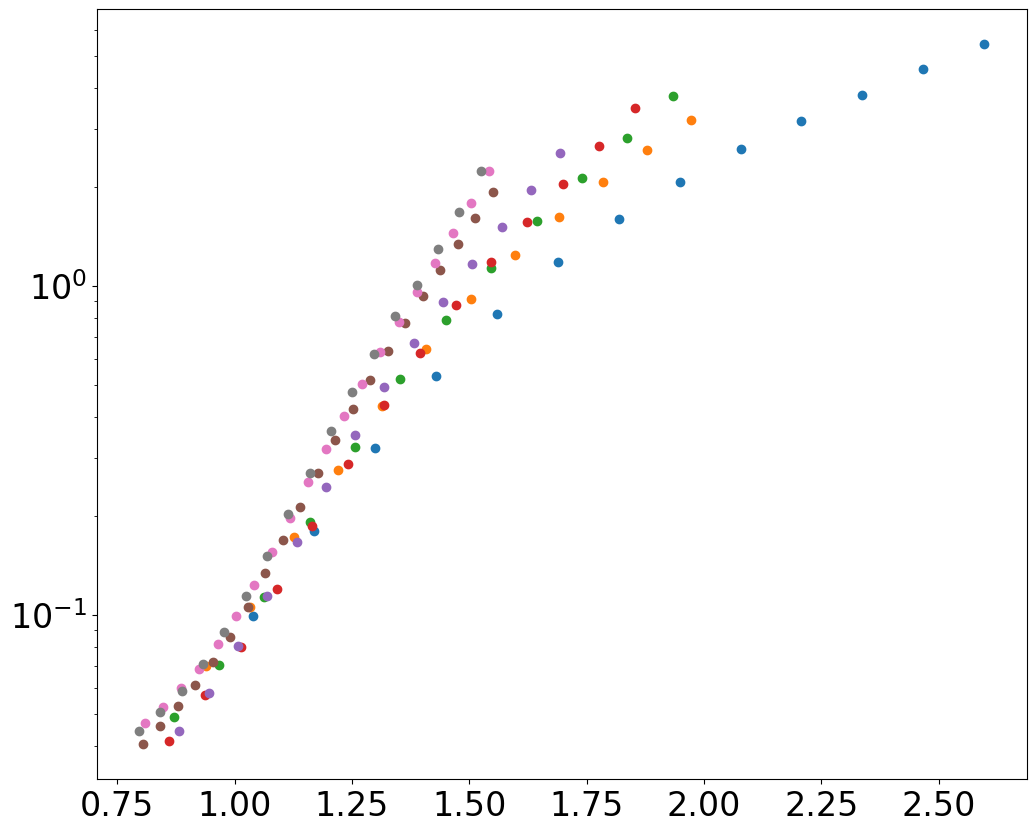

In [55]:
ps = [1.51, 8.62][:]
ps = np.array([9.74, 8.62, 7.63, 6.58, 5.5, 4.5, 3.55, 2.61, 1.51])[::-1][:-1]

for pg in ps:
    dst_g = pd.read_hdf(dst_path, f'{source}_{pg:.2f}bar_Photoetched')
    

    ### Photons / keV and / e-
    xdata   = dst_g.el_volt/dst_g.pressure/dist
    ydata   = dst_g.photons_kev/dst_g.pressure/(1000/wi)
    ydata_e = dst_g.photons_kev_e/dst_g.pressure/(1000/wi)
    plt.scatter(xdata, ydata)
    np.savez(f'/home/ander/Documents/Yield_{pg:.2f}bar.npz',ep=xdata,lyield=ydata,lyield_e=ydata_e)
    
plt.yscale('log')

In [21]:
xdata

0     2.649007
1     2.516556
2     2.384106
3     2.251656
4     2.119205
5     1.986755
6     1.854305
7     1.721854
8     1.589404
9     1.456954
10    1.324503
11    1.192053
12    1.059603
dtype: float64

In [22]:
ydata

0     5.413186
1     4.543518
2     3.806504
3     3.168490
4     2.599459
5     2.070698
6     1.591900
7     1.177084
8     0.819178
9     0.530804
10    0.320729
11    0.180201
12    0.099166
dtype: float64

In [23]:
1000/26.4

37.87878787878788

In [164]:
reso_j_interp(xel)

array([0.706763  , 0.72487588, 0.74298876, 0.76110164, 0.77921452,
       0.7973274 , 0.81544028, 0.83355316, 0.85166604, 0.86977892,
       0.8878918 , 0.90600468, 0.92411756, 0.94223044, 0.96034332,
       0.97845619, 0.99656907, 1.01468195, 1.03279483, 1.05090771,
       1.06902059, 1.08713347, 1.10524635, 1.12335923, 1.14147211,
       1.15958499, 1.17769787, 1.19581075, 1.21392363])

In [165]:
n_ie

224.59078797106966

In [172]:
el_yield(dst_g.el_volt/dst_g.pressure)*dst_g.pressure/100

0     6.7622
1     6.5597
2     6.3572
3     6.1547
4     5.9522
5     5.7497
6     5.5472
7     5.3447
8     5.1422
9     4.9397
10    4.7372
11    4.5347
12    4.3322
13    4.1297
14    3.9272
15    3.7247
16    3.5222
17    3.3197
18    3.1172
19    2.9147
20    2.7122
21    2.5097
22    2.3072
23    2.1047
24    1.9022
25    1.6997
26    1.4972
27    1.2947
28    1.0922
dtype: float64

In [ ]:
reso_j_interp(xel)/n_ie/(el_yield(dst_g.el_volt)*dst_g.pressure)

In [157]:
dst_g.photons_kev*5.9

0     2858.884951
1     2419.903663
2     2068.054939
3     1769.329284
4     1479.350566
5     1270.035504
6     1093.394997
7      934.559960
8      799.374293
9      678.755810
10     578.052352
11     491.824162
12     416.102193
13     354.867079
14     300.165109
15     258.971657
16     220.138640
17     190.209660
18     167.908825
19     149.865607
20     134.122349
21     121.154719
22     112.126776
23     101.635144
24      93.767713
25      87.431475
26      81.845647
27      76.065639
28      70.431302
Name: photons_kev, dtype: float64

In [162]:
14/9.74

1.4373716632443532

In [154]:
el_yield(dst_g.el_volt)*dst_g.pressure

0     10587.380
1     10390.145
2     10192.910
3      9995.675
4      9798.440
5      9601.205
6      9403.970
7      9206.735
8      9009.500
9      8812.265
10     8615.030
11     8417.795
12     8220.560
13     8023.325
14     7826.090
15     7628.855
16     7431.620
17     7234.385
18     7037.150
19     6839.915
20     6642.680
21     6445.445
22     6248.210
23     6050.975
24     5853.740
25     5656.505
26     5459.270
27     5262.035
28     5064.800
dtype: float64

In [151]:
(reso_j_interp(xel)/(dst_g.photons_kev*5.9)/(el_yield(dst_g.el_volt)*dst_g.pressure))

0     2.335009e-08
1     2.882995e-08
2     3.524699e-08
3     4.303501e-08
4     5.375625e-08
5     6.538755e-08
6     7.930560e-08
7     9.687696e-08
8     1.182547e-07
9     1.454145e-07
10    1.782937e-07
11    2.188377e-07
12    2.701630e-07
13    3.309307e-07
14    4.088100e-07
15    4.952561e-07
16    6.091547e-07
17    7.373875e-07
18    8.740650e-07
19    1.025208e-06
20    1.199890e-06
21    1.392162e-06
22    1.577590e-06
23    1.826625e-06
24    2.079594e-06
25    2.344696e-06
26    2.635747e-06
27    2.987585e-06
28    3.403011e-06
dtype: float64

In [141]:
from scipy.interpolate import interp1d

j = np.array([95.91971832068714, 
78.17935899533668, 
59.52111423867904, 
42.32965577879311, 
28.766139283759546,
19.548724270685476,
13.902474439144827,
10.82778126001136, 
8.058421877614814, 
4.778331938507145, 
3.4763093863088153,
2.2574514611449166,
1.4659475130423867,
1.0425385077307192,
0.6469269791785761,
0.4106641977223954,
0.24350795748598159,
0.16176388885439477,
0.12315740410163431,
0.10504649807437978,
0.09591971832068694,
0.10268645422887429,
0.10993055512157993,
0.13797570810297624,
0.17715575417179444,
0.28875287417994416,
0.3836026325548867,
0.5272777843225039,
0.6042963902381322,
0.7584626699552715])


ep = np.array([5.82444733420026,
5.7061118335500645,
5.5513654096228855,
5.36931079323797,
5.1690507152145635,
4.968790637191157,
4.814044213263978,
4.713914174252276,
4.5955786736020805,
4.3862158647594285,
4.258777633289988,
4.094928478543562,
3.9310793237971393,
3.8309492847854343,
3.6853055916775026,
3.557867360208061,
3.4122236671001294,
3.3029908972691797,
3.1300390117035097,
3.020806241872561,
2.966189856957087,
2.8023407022106626,
2.638491547464238,
2.501950585175552,
2.347204161248374,
2.0559167750325096,
1.88296488946684,
1.691807542262679,
1.5825747724317294,
1.364109232769831])

reso_j_interp = interp1d(ep, j, fill_value='extrapolate')

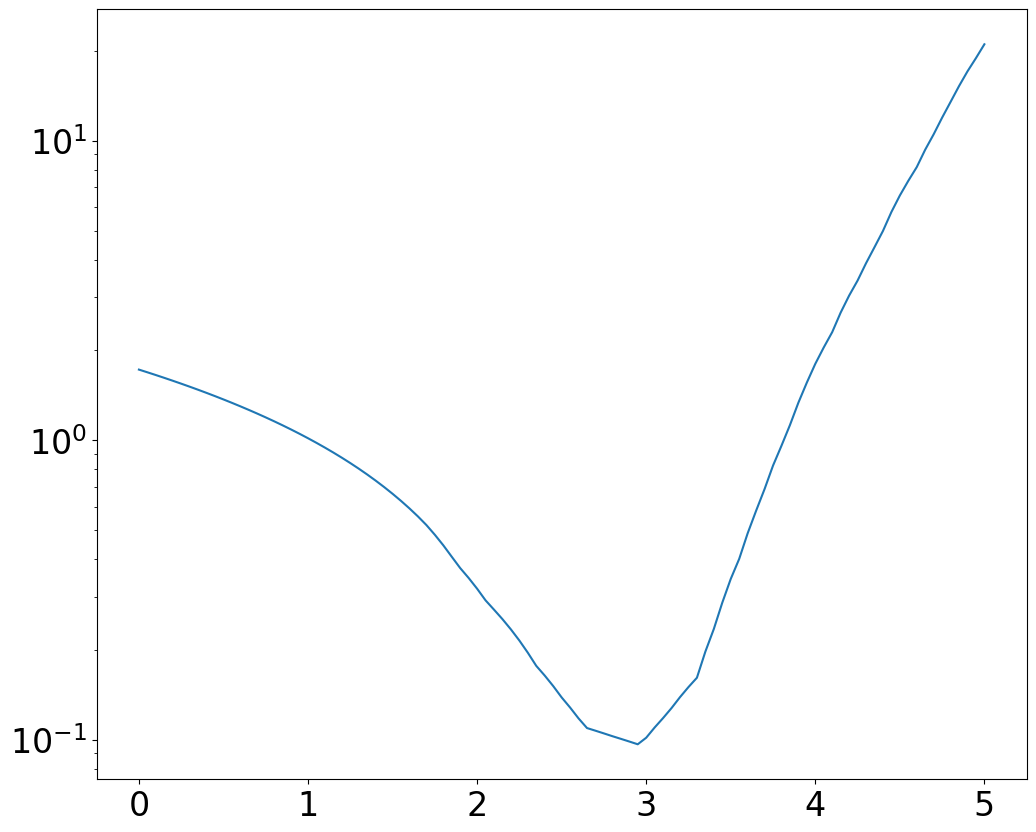

In [143]:
test= np .linspace(0, 5, 101)
plt.plot(test, reso_j_interp(test))
plt.yscale('log')

In [45]:
 np.linspace(*axes[2].get_xlim(), 101)

array([   3.33911934,   15.52108588,   27.70305241,   39.88501895,
         52.06698548,   64.24895202,   76.43091855,   88.61288509,
        100.79485162,  112.97681816,  125.15878469,  137.34075123,
        149.52271776,  161.7046843 ,  173.88665083,  186.06861737,
        198.2505839 ,  210.43255044,  222.61451697,  234.79648351,
        246.97845004,  259.16041658,  271.34238311,  283.52434965,
        295.70631618,  307.88828272,  320.07024925,  332.25221579,
        344.43418232,  356.61614886,  368.79811539,  380.98008193,
        393.16204846,  405.344015  ,  417.52598153,  429.70794807,
        441.8899146 ,  454.07188114,  466.25384767,  478.43581421,
        490.61778074,  502.79974728,  514.98171381,  527.16368034,
        539.34564688,  551.52761341,  563.70957995,  575.89154648,
        588.07351302,  600.25547955,  612.43744609,  624.61941262,
        636.80137916,  648.98334569,  661.16531223,  673.34727876,
        685.5292453 ,  697.71121183,  709.89317837,  722.07514

In [31]:
axes[2].get_xlim()

(3.339119344061834, 1221.5357728342703)

In [28]:
np.sqrt(4300)/4300 * 235

3.5837164028162096

In [27]:
nphot

array([  33.63029464,   76.40599733,  119.18170002,  161.95740271,
        204.7331054 ,  247.50880809,  290.28451079,  333.06021348,
        375.83591617,  418.61161886,  461.38732155,  504.16302424,
        546.93872693,  589.71442962,  632.49013231,  675.26583501,
        718.0415377 ,  760.81724039,  803.59294308,  846.36864577,
        889.14434846,  931.92005115,  974.69575384, 1017.47145654,
       1060.24715923, 1103.02286192, 1145.79856461, 1188.5742673 ,
       1231.34996999, 1274.12567268, 1316.90137537, 1359.67707806,
       1402.45278076, 1445.22848345, 1488.00418614, 1530.77988883,
       1573.55559152, 1616.33129421, 1659.1069969 , 1701.88269959,
       1744.65840229, 1787.43410498, 1830.20980767, 1872.98551036,
       1915.76121305, 1958.53691574, 2001.31261843, 2044.08832112,
       2086.86402381, 2129.63972651, 2172.4154292 , 2215.19113189,
       2257.96683458, 2300.74253727, 2343.51823996, 2386.29394265,
       2429.06964534, 2471.84534803, 2514.62105073, 2557.39675

In [ ]:
    dst_a = pd.read_hdf(dst_alpha_path, f'241Am_{8.44:.2f}bar_Ar')


In [ ]:
xdata

In [ ]:
dst_a.s2_photons_e

In [ ]:
wire_r    = 50/2
wire_dist = 500
transparency_m = ((wire_dist-wire_r*2)/wire_dist)**2


hex_r      = 1.467
hex_thick  = 150/2/1000 #mum to mm
hex_a      = hex_r * np.sqrt(3)/2
hex_area   = 2.598 * hex_r**2

hex_ring_a = hex_a+hex_thick
hex_ring_r = 2 * hex_ring_a / np.sqrt(3)
hex_ring_area = 2.598 * hex_ring_r**2
transparency_g = hex_area/hex_ring_area

print(f'Transparency of wire mesh: {transparency_m}')
print(f'Transparency of photoetched grid: {transparency_g}')

In [ ]:
The gate is a thin wire mesh of 50 μm
diameter wires with a 500 μm spacing that has been cryo-
fitted to two concentrical rings acting as a holder. The
anode is a 75 μm thick photoetched hexagonal grid at-
tached to a holder ring with kapton tape in the edges. Its
hexagons have a 1.467 mm side and their contour is 150
μm wide.

In [ ]:
0.6/0.9

In [ ]:
y1 = np.exp(xm)
y2 = np.exp(2*xm)
y3 = np.exp(3*xm)

plt.plot(xm, y2/y1)
plt.plot(xm, y3/y1)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].errorbar(dst.el_volt/dst.pressure/dist, dst.photons_kev/dst.pressure, label='Data', marker='o',ls='--', c='k')
axes[1].errorbar(dst.el_volt/dst.pressure/dist, dst.resolution              , label='Data', marker='o',ls='--', c='k')
axt = axes[0].twinx()
axt.errorbar(dst.el_volt/dst.pressure/dist, dst.photons_kev/dst.pressure*(wi/1000), label='Data', marker='o',ls='--', c='k')

for ax in axes:
    ax.set_xlabel('EL field (kV/cm/bar)')
    #ax.legend()
    
axes[0].set_ylabel('Det. photons / keV')
axt    .set_ylabel('Det. photons / e⁻')
axes[1].set_ylabel('Resolution (% FWHM)')

fig.tight_layout()
#intrinsic_e   = np.array([get_intrinsic_resolution(eref*1000, fano, wi, mu/3, pmt_sigma) for mu in mus[:,0]])


In [ ]:
### 
Alph